<a href="https://colab.research.google.com/github/rishiraj1746/Learnings/blob/main/Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project I - ***Toy Project***
## Goal:
0. Preprocessing + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the Model
5. Evaluate the Model/Model Selection
6. Deploy the model

In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/placement.csv')

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.shape

(100, 4)

In [8]:
df  = df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [11]:
import matplotlib.pyplot as plt


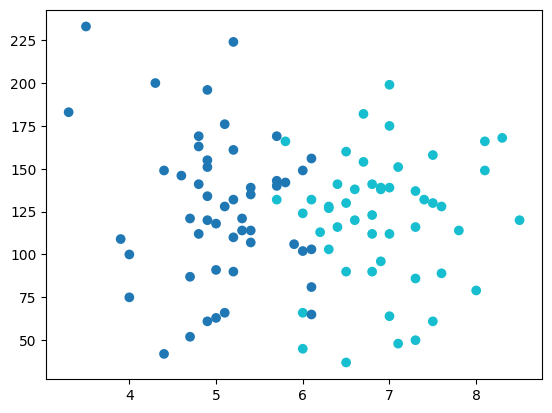

In [18]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'], cmap='tab10')

In [22]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [23]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [25]:
Y.shape

(100,)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [28]:
X_train

,cgpa,iq
7,5.0,63.0
60,6.9,139.0
24,4.7,121.0
51,4.8,141.0
6,5.7,143.0
...,...,...
81,5.4,107.0
18,4.0,100.0
57,6.5,130.0
20,6.6,120.0


In [29]:
Y_train

,placement
7,0
60,1
24,0
51,0
6,0
...,...
81,0
18,0
57,1
20,1


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_train

array([[-0.83386551, -1.4999743 ],
       [ 0.8456516 ,  0.38325335],
       [-1.09905243, -0.06277425],
       [-1.01065679,  0.43281197],
       [-0.21509605,  0.48237059],
       [-0.5686786 , -0.23622943],
       [-0.92226115,  0.25935679],
       [-1.36423934, -2.02033984],
       [-0.21509605,  1.12663268],
       [-0.83386551, -0.80615359],
       [-0.65707424,  0.92839819],
       [-0.65707424,  0.20979817],
       [-0.12670041,  1.05229475],
       [ 1.19923415, -1.82210535],
       [ 0.49206905, -0.8309329 ],
       [-1.09905243, -0.90527083],
       [-0.48028296, -0.23622943],
       [ 0.31527777, -0.50880186],
       [-0.5686786 , -0.06277425],
       [-2.33659135,  1.47354304],
       [-0.74546988, -1.42563637],
       [-0.92226115, -0.08755357],
       [ 0.31527777,  0.11068092],
       [ 0.1384865 , -1.0539467 ],
       [ 0.66886032,  1.44876373],
       [-0.65707424, -0.33534668],
       [ 0.93404724, -1.47519499],
       [ 0.66886032,  0.75494301],
       [ 0.1384865 ,

In [35]:
X_test = scaler.transform(X_test)

In [36]:
X_test

array([[ 0.93404724,  1.87001202],
       [ 1.64121234, -0.23622943],
       [ 1.37602542,  0.16023955],
       [ 1.28762979,  0.20979817],
       [-1.80621753, -0.36012599],
       [ 0.05009086,  0.63104646],
       [ 0.75725596, -0.8309329 ],
       [-0.48028296,  0.2841361 ],
       [ 0.05009086, -1.42563637],
       [ 0.40367341, -0.18667081]])

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(X_test)

In [42]:
Y_test

,placement
26,1
55,1
83,1
3,1
31,0
33,0
35,1
49,0
45,1
13,1


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(Y_test,y_pred)

0.8

In [48]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

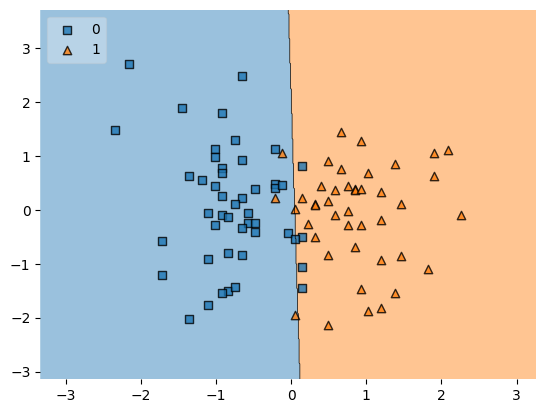

In [49]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [50]:
import pickle

In [51]:
pickle.dump(clf,open('model.pkl','wb'))